# 🎬 Reto de Análisis de Películas – *Movies Challenge*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
# Project root directory
project_root = Path().resolve()
movies_data_path = project_root.parent / "data" / "movies.csv"


In [ ]:
df_movies = pd.read_csv(movies_data_path, sep=',', encoding='utf-8')
df_movies.head() 

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [ ]:
# Descripcion de las tablas
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

### 1️⃣ Duración promedio por década  
**Pregunta:**  
> ¿Cuál es la duración media de las películas y cómo ha evolucionado en cada década?

**Pista:**  
Agrupa por la **década** derivada de la columna `title_year` y calcula la media de `duration`.

In [11]:
# código
duracion_media = df_movies['duration'].mean()
print(f"La duración media de todas las películas es: {duracion_media:.2f} minutos")

df_movies['decada'] = (df_movies['title_year'] // 10) * 10

duracion_media_decada = df_movies.groupby('decada')['duration'].mean()

print("Duración media de las películas por década:\n")
for decada, media in duracion_media_decada.items():
    print(f"{int(decada)}s: {media:.2f} minutos")



La duración media de todas las películas es: 107.20 minutos
Duración media de las películas por década:

1910s: 123.00 minutos
1920s: 123.20 minutos
1930s: 101.80 minutos
1940s: 107.80 minutos
1950s: 120.54 minutos
1960s: 130.10 minutos
1970s: 117.87 minutos
1980s: 111.74 minutos
1990s: 111.33 minutos
2000s: 106.40 minutos
2010s: 106.25 minutos


### 2️⃣ Directores taquilleros  
**Pregunta:**  
> ¿Qué 5 directores acumulan la mayor recaudación total (`gross`) en el dataset?

**Pista:**  
Agrupa por `director_name`, suma la columna `gross`, luego ordena de mayor a menor y muestra los primeros cinco resultados.

In [ ]:
# código
recaudacion_por_director = df_movies.groupby('director_name')['gross'].sum()

top_5_directores = recaudacion_por_director.sort_values(ascending=False).head(5)

print("Los 5 directores con mayor recaudación total son:\n")
print(top_5_directores)


🎬 Los 5 directores con mayor recaudación total son:

director_name
Steven Spielberg    4.114233e+09
Peter Jackson       2.592969e+09
Michael Bay         2.231243e+09
Tim Burton          2.071275e+09
Sam Raimi           2.049549e+09
Name: gross, dtype: float64


### 3️⃣ Presupuesto vs. Éxito crítico  
**Pregunta:**  
> ¿Existe correlación entre el presupuesto (`budget`) y la puntuación IMDb (`imdb_score`)?

**Pista:**  
Convierte `budget` a numérico (puede tener nulos), luego usa el método `.corr()` de Pandas para obtener el coeficiente de Pearson entre ambas columnas.

In [13]:
# código

df_movies['budget'] = pd.to_numeric(df_movies['budget'], errors='coerce')

correlacion = df_movies['budget'].corr(df_movies['imdb_score'])

print(f"El coeficiente de correlación (Pearson) entre presupuesto y puntuación IMDb es: {correlacion:.4f}")


El coeficiente de correlación (Pearson) entre presupuesto y puntuación IMDb es: 0.0307


### 4️⃣ Género y clasificación  
**Pregunta:**  
> ¿Cuál es el género con el mayor porcentaje de películas clasificadas como **PG-13**?

**Pista:**  
1. La columna `genres` contiene varios géneros separados por `"|"`.  
2. Expande esa columna (`str.split('|')`) y usa `explode()` para tener un género por fila.  
3. Filtra las filas con `content_rating == 'PG-13'`, cuenta cuántas películas tiene cada género y calcula el porcentaje sobre el total de PG-13.

In [14]:
# código
df_exploded = df_movies.assign(genres=df_movies['genres'].str.split('|')).explode('genres')

df_pg13 = df_exploded[df_exploded['content_rating'] == 'PG-13']

conteo_por_genero = df_pg13['genres'].value_counts()

porcentajes = (conteo_por_genero / conteo_por_genero.sum()) * 100

genero_top = porcentajes.idxmax()

porcentaje_top = porcentajes.max()

print(f"El género con mayor porcentaje de películas PG-13 es: {genero_top} ({porcentaje_top:.2f}%)")


El género con mayor porcentaje de películas PG-13 es: Drama (17.00%)


### 5️⃣ Críticas vs. Puntuación  
**Pregunta:**  
> ¿Cómo se relaciona el número de **críticas de usuarios** con la puntuación IMDb?

**Pista:**  
Utiliza la columna `num_user_for_reviews` como indicador de cuántas críticas ha recibido una película.  
Calcula el coeficiente de correlación (Pearson) con `imdb_score` y, opcionalmente, crea un scatterplot para visualizar la relación.

El coeficiente de correlación (Pearson) entre críticas de usuarios y IMDb score es: 0.2925


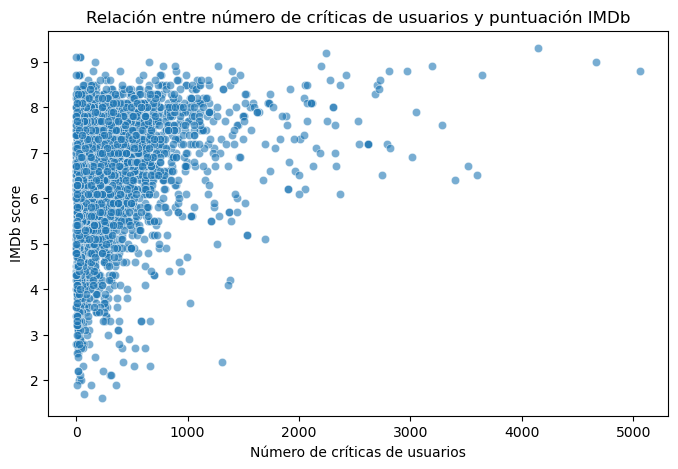

In [15]:
# código
df_movies['num_user_for_reviews'] = pd.to_numeric(df_movies['num_user_for_reviews'], errors='coerce')

correlacion = df_movies['num_user_for_reviews'].corr(df_movies['imdb_score'])
print(f"El coeficiente de correlación (Pearson) entre críticas de usuarios y IMDb score es: {correlacion:.4f}")

plt.figure(figsize=(8,5))
sns.scatterplot(data=df_movies, x='num_user_for_reviews', y='imdb_score', alpha=0.6)
plt.title('Relación entre número de críticas de usuarios y puntuación IMDb')
plt.xlabel('Número de críticas de usuarios')
plt.ylabel('IMDb score')
plt.show()

### 6️⃣ Mercados más lucrativos  
**Pregunta:**  
> ¿Qué país presenta la **mediana** de recaudación (`gross`) más alta?

**Pista:**  
Agrupa por `country`, calcula la **mediana** de `gross`, ordena de mayor a menor y revisa el primer resultado.  
La mediana es menos sensible a outliers que el promedio, por eso se usa aquí.

In [16]:
# código
df_movies['gross'] = pd.to_numeric(df_movies['gross'], errors='coerce')

mediana_gross_por_pais = df_movies.groupby('country')['gross'].median()

mediana_gross_ordenada = mediana_gross_por_pais.sort_values(ascending=False)

pais_top = mediana_gross_ordenada.index[0]
mediana_top = mediana_gross_ordenada.iloc[0]

print(f"El país con la mediana de recaudación más alta es: {pais_top} (${mediana_top:,.0f})")


El país con la mediana de recaudación más alta es: Taiwan ($64,340,682)


### 7️⃣ Color vs. Blanco-y-negro  
**Pregunta:**  
> ¿Cómo difieren las puntuaciones IMDb entre películas a **color** y **blanco-y-negro**?

**Pista:**  
La columna `color` indica `'Color'` o `'Black and White'`.  
Comparar las distribuciones con un **boxplot** (o violinplot) y, si quieres un número, calcula la media o mediana de `imdb_score` para cada categoría.

Estadísticas IMDb por categoría de color:

                      mean  median  count
color                                    
 Black and White  7.227273     7.4    209
Color             6.409533     6.5   4815


C:\Users\ezequ\AppData\Local\Temp\ipykernel_6220\2047782371.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_movies, x='color', y='imdb_score', palette='pastel')


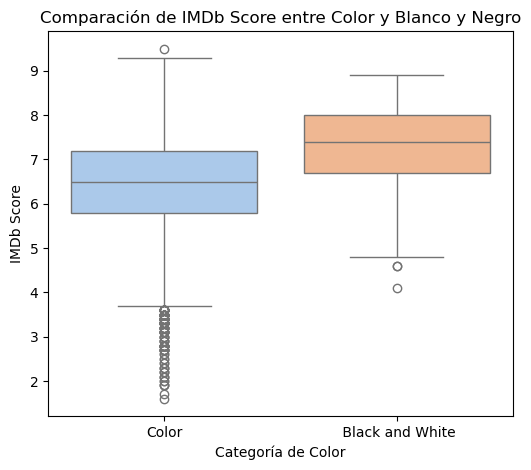

In [17]:
# código
stats_color = df_movies.groupby('color')['imdb_score'].agg(['mean', 'median', 'count'])

print("Estadísticas IMDb por categoría de color:\n")
print(stats_color)

plt.figure(figsize=(6,5))
sns.boxplot(data=df_movies, x='color', y='imdb_score', palette='pastel')

plt.title('Comparación de IMDb Score entre Color y Blanco y Negro')
plt.xlabel('Categoría de Color')
plt.ylabel('IMDb Score')
plt.show()

### 8️⃣ Rostro del éxito  
**Pregunta:**  
> ¿Qué actor o actriz aparece con mayor frecuencia entre las **100 películas con mejor puntuación IMDb**?

**Pista:**  
1. Ordena el DataFrame por `imdb_score` de forma descendente y conserva solo las primeras 100 filas.  
2. Combina las columnas `actor_1_name`, `actor_2_name`, `actor_3_name` en una sola serie (`pd.concat`).  
3. Usa `value_counts()` para contar apariciones y obtén el primer resultado.

In [18]:
# código
top_100 = df_movies.sort_values(by='imdb_score', ascending=False).head(100)

actores = pd.concat([
    top_100['actor_1_name'],
    top_100['actor_2_name'],
    top_100['actor_3_name']
])

actor_top = actores.value_counts().idxmax()
apariciones = actores.value_counts().max()

print(f"El actor o actriz que más aparece en las 100 películas mejor puntuadas es: {actor_top} con {apariciones} apariciones.")


El actor o actriz que más aparece en las 100 películas mejor puntuadas es: Harrison Ford con 5 apariciones.


### 9️⃣ Recaudación por clasificación  
**Pregunta:**  
> ¿Cómo varía la recaudación (`gross`) según la clasificación por edad (`content_rating`)?  
> (Compara las distribuciones con un **boxplot**).

**Pista:**  
Filtra valores nulos en `gross`, usa `hue="color"` `sns.boxplot()` con `x='content_rating'` y `y='gross'`; rota las etiquetas para legibilidad.

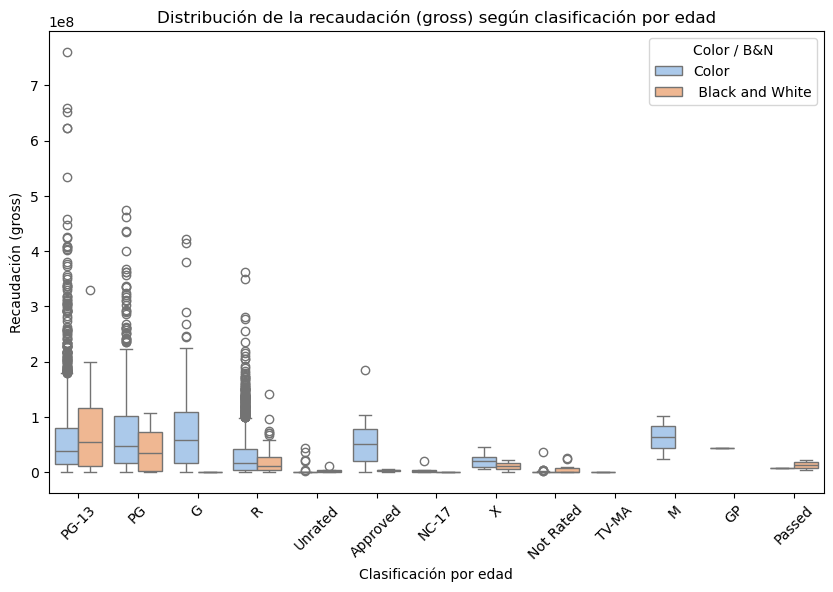

In [ ]:
# código
df_movies['gross'] = pd.to_numeric(df_movies['gross'], errors='coerce')
df_boxplot = df_movies.dropna(subset=['gross', 'content_rating'])

plt.figure(figsize=(10,6))
sns.boxplot(data=df_boxplot, x='content_rating', y='gross', hue='color', palette='pastel')

plt.title('Distribución de la recaudación (gross) según clasificación por edad')
plt.xlabel('Clasificación por edad')
plt.ylabel('Recaudación (gross)')
plt.xticks(rotation=45)   
plt.legend(title='Color / B&N')
plt.show()

### 🔟 Géneros más rentables  
**Pregunta:**  
> ¿Qué **tres géneros** presentan la recaudación promedio (`gross`) más alta?

**Pista:**  
Expande la columna `genres` con `str.split('|')` + `explode()`, convierte `gross` a numérico, agrupa por género y calcula la media.

In [20]:
# código
df_movies['gross'] = pd.to_numeric(df_movies['gross'], errors='coerce')

df_exploded = df_movies.assign(genres=df_movies['genres'].str.split('|')).explode('genres')

recaudacion_promedio = df_exploded.groupby('genres')['gross'].mean()

top_3_generos = recaudacion_promedio.sort_values(ascending=False).head(3)

print("Los 3 géneros con mayor recaudación promedio son:\n")
print(top_3_generos)


Los 3 géneros con mayor recaudación promedio son:

genres
Animation    1.069542e+08
Adventure    9.840519e+07
Family       8.930231e+07
Name: gross, dtype: float64


## 🎉 ¡Felicitaciones!

Has completado el **Reto de Análisis de Películas** — demostraste tu habilidad para limpiar datos, explorar patrones y extraer insights accionables a partir de información cinematográfica. 👏

Tu notebook ya forma parte de la colección de soluciones de PyData Panamá.  
¡Comparte tus hallazgos en redes y sigue practicando; el próximo blockbuster de datos espera por ti! 🚀